# GRIP THE SPARKS FOUNDATION

# TASK-1

#  **********************PROJECT NAME = STUDENT'S SCORE PREDICTION**********************

#                                                Author=SimranBhardwaj

In [1]:
#IMPORTING THE USEFUL PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#LOADING DATASET

In [2]:
filepath='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(filepath)

In [ ]:
#STUDYING THE GIVEN DATA 

In [3]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.shape

(25, 2)

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [10]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [ ]:
#VISUALIZING THE GIVEN DATASET

Text(0, 0.5, 'SCORES')

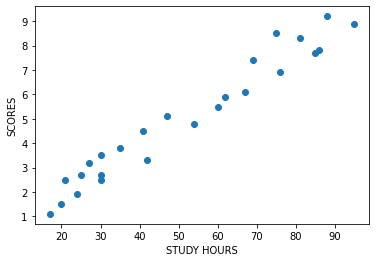

In [11]:
plt.scatter(x=data.Scores,y=data.Hours)
plt.xlabel("STUDY HOURS")
plt.ylabel("SCORES")

<AxesSubplot:>

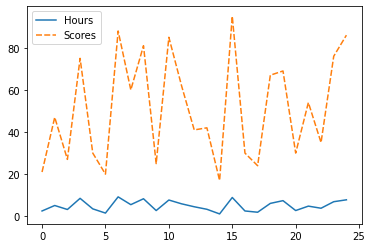

In [12]:
sns.lineplot(data=data)

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

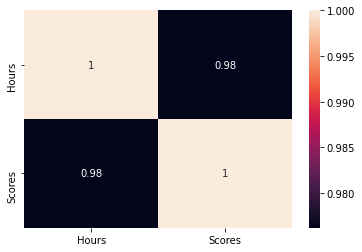

In [13]:

sns.heatmap(data.corr(),annot=True)

In [ ]:
#SEPRATING THE INDEPENDENT AND DEPENDENT VARIABLES

In [15]:
x=data.Hours
y=data.Scores
x.head(10)

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
5    1.5
6    9.2
7    5.5
8    8.3
9    2.7
Name: Hours, dtype: float64

In [ ]:
#SPLITTING THE DATASET INTO TESTING AND TRAINING DATA

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print("Shape of train_x data:",train_x.shape)
print("Shape of train_y data:",train_y.shape)
print("Shape of test_x data:",test_x.shape)
print("Shape of test_y data:",test_y.shape)

Shape of train_x data: (20,)
Shape of train_y data: (20,)
Shape of test_x data: (5,)
Shape of test_y data: (5,)


In [ ]:
#SELECTING THE MODEL AND IMPORTING IT

In [18]:
from sklearn.linear_model import LinearRegression
#DEFINING IT
model=LinearRegression()
#TRAINING IT
model.fit(train_x.to_numpy().reshape(-1,1),train_y)

LinearRegression()

In [19]:
m=model.coef_
c=model.intercept_

In [20]:
print("The coefficient(slope) of the model:",m)
print("The constant(intercept) of the model:",c)

The coefficient(slope) of the model: [9.91065648]
The constant(intercept) of the model: 2.0181600414346974


In [ ]:
#MAKING THE PREDICTIONS 

In [21]:
predicted_score=model.predict(test_x.to_numpy().reshape(-1,1))
print(predicted_score)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(test_y,predicted_score)
print(MAE)

4.183859899002975


In [23]:
model.score(test_x.to_numpy().reshape(-1,1),test_y.to_numpy().reshape(-1,1))

0.9454906892105355

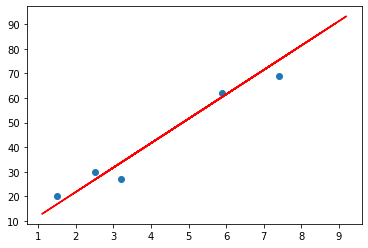

In [24]:
plt.scatter(test_x,test_y)
plt.plot(train_x,model.predict(train_x.to_numpy().reshape(-1,1)),color="red")

In [25]:
pd.DataFrame(np.c_[test_x,test_y,predicted_score],columns=["study_hours","actual_score","predicted_score"])

,study_hours,actual_score,predicted_score
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [26]:
def score(x):
    {
       print("The predicted score according your given study hours=",m*x+c) 
        
    }

In [27]:
print("how many predictions you want to do=")
n=int(input())
for i in range(n):
    print("Enter number of study hours=")
    x=input()
    score(float(x))

how many predictions you want to do=
2
Enter number of study hours=
3.2
The predicted score according your given study hours= [33.73226078]
Enter number of study hours=
9.9
The predicted score according your given study hours= [100.1336592]


# PRESENT YOUR SOLUTION 

In [28]:
import joblib
joblib.dump(model,"student_scores_predictor.pk1")

['student_scores_predictor.pk1']

In [29]:
model=joblib.load("student_scores_predictor.pk1")

In [30]:
model.predict([[9.25]])

array([93.69173249])